In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')
import io

In [91]:
from google.colab import files
uploaded = files.upload()

Saving DS2_C5_S7_KCHouse_Data_Practice.csv to DS2_C5_S7_KCHouse_Data_Practice (2).csv


In [92]:

df = pd.read_csv(io.BytesIO(uploaded['DS2_C5_S7_KCHouse_Data_Practice.csv']))
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [93]:
# task 1

In [94]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [96]:
df.shape

(21613, 21)

In [97]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [98]:
df['date'] = LabelEncoder().fit_transform(df['date'])

In [99]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005367,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005367,1.000000,-0.004649,-0.016964,-0.034481,-0.034570,0.006361,-0.022395,0.001544,-0.001837,...,-0.040040,-0.027890,-0.019554,-0.000471,-0.024401,0.001376,-0.032851,-0.007205,-0.031653,0.002643
price,-0.016762,-0.004649,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016964,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034481,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034570,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006361,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022395,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001544,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001837,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


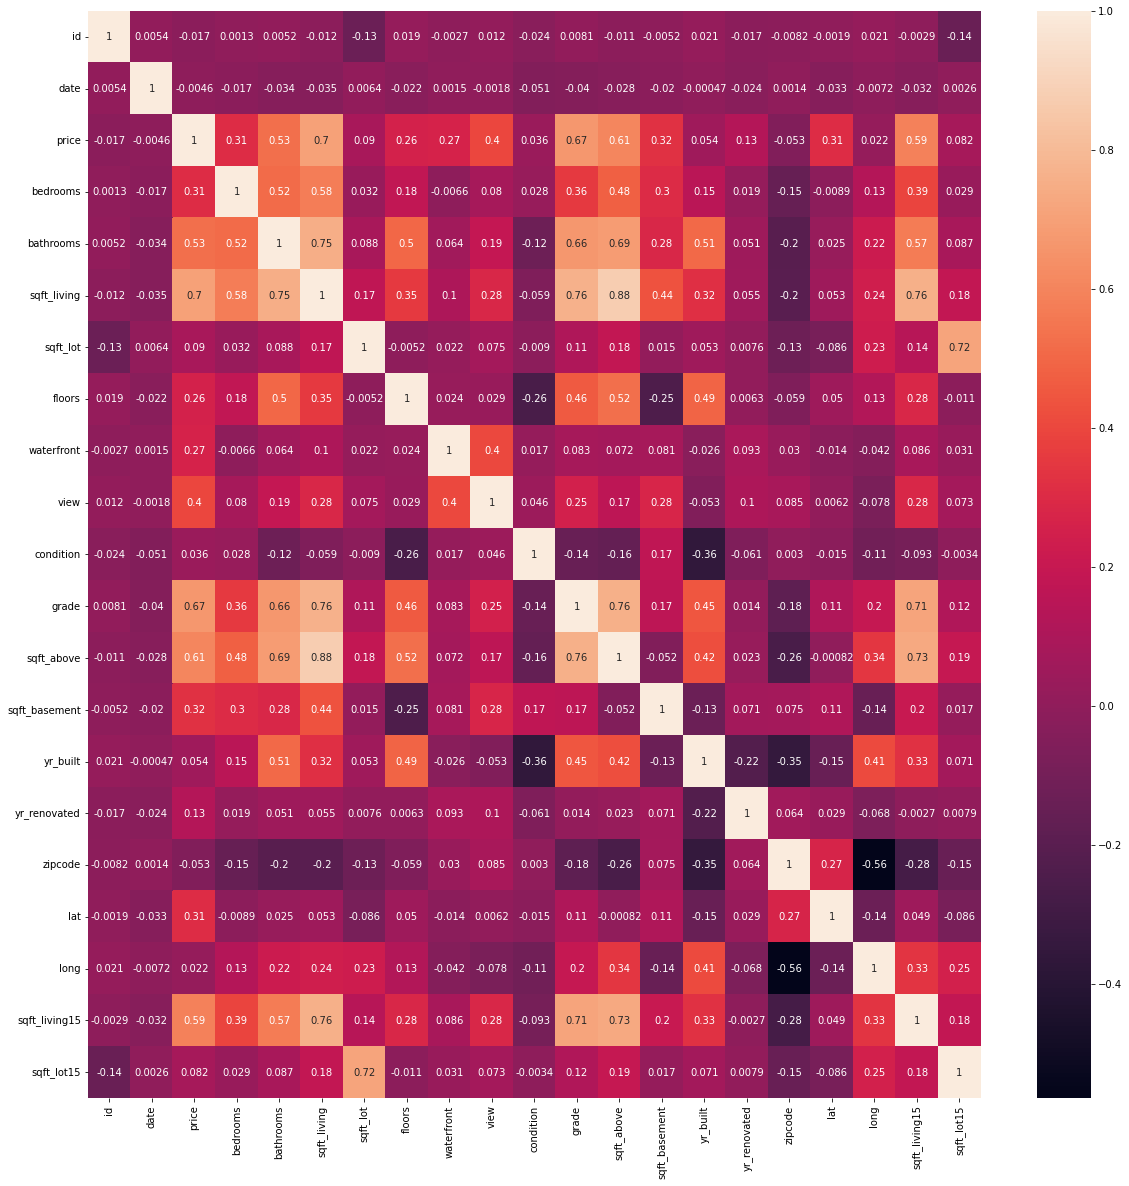

In [100]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)

In [101]:
# task 2

In [102]:
x = df[['bedrooms','bathrooms','sqft_above','view','waterfront','grade','sqft_living15','condition','floors','sqft_basement']]
y = df['price']

In [103]:
results, names = [],[]

In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8 , random_state = 1)

In [105]:
ytrain = ytrain.values.reshape(-1, 1)
ytest = ytest.values.reshape(-1, 1)

In [106]:
for i in [xtrain, xtest, ytrain, ytest]:
    i = MinMaxScaler().fit_transform(i)

In [107]:
s1 = LinearRegression().fit(xtrain, ytrain)

In [108]:
s1.score(xtrain, ytrain)

0.6023396784679134

In [109]:
print("Intercept=",s1.intercept_, '\n', 'slope=',s1.coef_)

Intercept= [-701925.87165125] 
 slope= [[-2.87296200e+04 -1.70277289e+04  1.69309841e+02  5.70432326e+04
   5.43751028e+05  1.02306974e+05  1.11440858e+01  5.26947135e+04
   5.17243505e+03  2.06425837e+02]]


In [110]:
ypred = s1.predict(xtest)  
ypred

array([[ 730213.4767075 ],
       [ 358883.85117958],
       [ 953159.51539532],
       ...,
       [ 490025.81826081],
       [1326218.41474576],
       [ 335739.13487099]])

In [111]:
mean_squared_error(ytest,ypred) 

67697815749.90351

In [112]:
r2_score(ytest, ypred)

0.6077784769640096

In [113]:
# task 3

In [114]:
model = RandomForestRegressor()
cv = KFold(n_splits=5,shuffle=True, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results.append(n_scores)
names.append('rf')
np.mean(n_scores), np.std(n_scores)

(-44776897301.81804, 4435483550.856658)

In [115]:
# task 4

In [116]:
m = AdaBoostRegressor()
cv = KFold(n_splits=5,shuffle=True, random_state=1)
n_scores = cross_val_score(m, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
results.append(n_scores)
names.append('ada')
np.mean(n_scores), np.std(n_scores)

(-122790784180.92497, 13976388600.463398)

In [117]:
# task 5

In [118]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [119]:
def get_stacking():
    level0 = []
    level0.append(('SVM',SVR()))
    level0.append(('DecisionTree',DecisionTreeRegressor()))
    level0.append(('KNN',KNeighborsRegressor()))
    level1 = LinearRegression()

    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return  model

In [120]:
model = get_stacking()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
n_scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
results.append(n_scores)
names.append('Stacking')
np.mean(n_scores), np.std(n_scores)

(-57503056052.81106, 6776742208.48723)

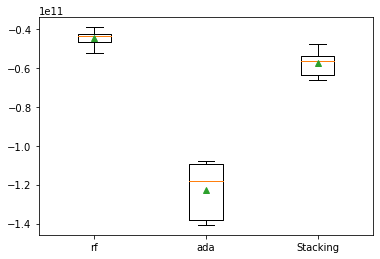

In [121]:
# task 6

plt.boxplot(results, labels=names, showmeans=True)
plt.show()